# Sprint2_Part2_colab(3)_데이터 시각화 및 분석

**서울시 자전거(따릉이) 대여 데이터 셋**
2017년 12월 부터 2018년 11월까지의 서울시 자전거 대여 정보

![SeoulBike](https://www.bikeseoul.com/img/main/main_visual.png)

| 컬럼명 | 의미 | 설명 |
|------|------|----------------|
| Date | 날짜 | Date / String |
| Rented Bike Count | 자전거 대여 수 | Integer |
| Hour | 시간 | 0 ~ 23 |
| Temperature(°C) | 기온 (섭씨) | Float |
| Humidity(%) | 습도 (%) | Integer |
| Wind speed (m/s) | 풍속 (m/s) | Float |
| Visibility (10m) | 가시거리 (단위: 10m) | Integer |
| Dew point temperature(°C) | 이슬점 (섭씨) | Float |
| Solar Radiation (MJ/m2) | 태양 복사 (MJ/m²) | Float |
| Rainfall(mm) | 강수량 (mm) | Float |
| Snowfall (cm) | 적설량 (cm) | Float |
| Seasons | 계절 | Spring, Summer, Autumn, Winter |
| Holiday | 공휴일 | Holiday / No Holiday |
| Functioning Day | 운영일 여부 | Yes / No |


## 데이터 불러오기

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/rngus4656/datasets/refs/heads/main/S2/SeoulBikeData_train.csv'
df = pd.read_csv(url, encoding='utf-8')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,id
0,05/06/2018,742,1,20.0,67,0.7,1426,13.6,0.00,0.0,0.0,Summer,No Holiday,Yes,10019
1,30/10/2018,1442,19,8.0,52,2.1,2000,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,13982
2,05/10/2018,23,12,16.6,90,1.7,518,14.9,0.51,2.0,0.0,Autumn,No Holiday,Yes,12391
3,11/02/2018,93,2,-7.0,42,1.6,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,11580
4,28/04/2018,152,5,10.9,81,1.7,348,7.7,0.00,0.0,0.0,Spring,No Holiday,Yes,12042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,01/10/2018,959,11,17.0,45,4.5,1966,4.9,2.04,0.0,0.0,Autumn,No Holiday,Yes,16435
7004,25/07/2018,791,12,31.1,60,2.7,1331,22.4,1.02,0.0,0.0,Summer,No Holiday,Yes,13347
7005,15/11/2018,154,4,6.1,72,0.5,1052,1.4,0.00,0.0,0.0,Autumn,No Holiday,Yes,16080
7006,19/11/2018,88,4,4.5,67,0.9,1175,-1.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,12980


In [38]:
# info에서는 어떤 특징을 알 수 있을까?

print(df.shape)
df.info()

(7008, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            7008 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           7008 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    7008 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-n

In [39]:
# describe에서 알 수 있는 특징들을 정리 해보자

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),id
count,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,706.211758,11.512129,13.031107,58.317494,1.728567,1437.730451,4.233790,0.572788,0.142409,0.074886,14375.555936
std,649.132829,6.912871,11.894161,20.366061,1.038034,606.505359,13.014189,0.874385,1.019976,0.437995,2526.380153
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,10000.000000
25%,190.000000,6.000000,3.700000,43.000000,0.900000,948.000000,-4.400000,0.000000,0.000000,0.000000,12183.750000
50%,509.000000,12.000000,14.000000,57.000000,1.500000,1692.500000,5.200000,0.010000,0.000000,0.000000,14357.500000
75%,1066.000000,17.000000,22.600000,74.000000,2.300000,2000.000000,14.925000,0.930000,0.000000,0.000000,16578.250000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,24.000000,8.800000,18759.000000


In [40]:

df.describe(exclude='number')


,Date,Seasons,Holiday,Functioning Day
count,7008,7008,7008,7008
unique,365,4,2,2
top,25/10/2018,Summer,No Holiday,Yes
freq,24,1790,6656,6771


In [41]:
df.isna().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [42]:
df.duplicated().sum()

np.int64(0)

# 데이터 정제 및 시각화 준비

## Feature Engineering

### Datetime 타입 변환  
Date 칼럼을 읽을 수 있는 날짜 형식으로 변환한다.

In [43]:
# Date 칼럼이 Object형식의 DD/MM/YYYY로 되어있어 기본적인 datetime 형식으로 변환해준다.
df2 = df.copy()
df2['Date'].head()

,Date
0,05/06/2018
1,30/10/2018
2,05/10/2018
3,11/02/2018
4,28/04/2018


In [44]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')
df2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,id
0,2018-06-05,742,1,20.0,67,0.7,1426,13.6,0.00,0.0,0.0,Summer,No Holiday,Yes,10019
1,2018-10-30,1442,19,8.0,52,2.1,2000,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,13982
2,2018-10-05,23,12,16.6,90,1.7,518,14.9,0.51,2.0,0.0,Autumn,No Holiday,Yes,12391
3,2018-02-11,93,2,-7.0,42,1.6,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,11580
4,2018-04-28,152,5,10.9,81,1.7,348,7.7,0.00,0.0,0.0,Spring,No Holiday,Yes,12042


In [45]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/$%m/%y')
df2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,id
0,2018-06-05,742,1,20.0,67,0.7,1426,13.6,0.00,0.0,0.0,Summer,No Holiday,Yes,10019
1,2018-10-30,1442,19,8.0,52,2.1,2000,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,13982
2,2018-10-05,23,12,16.6,90,1.7,518,14.9,0.51,2.0,0.0,Autumn,No Holiday,Yes,12391
3,2018-02-11,93,2,-7.0,42,1.6,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,11580
4,2018-04-28,152,5,10.9,81,1.7,348,7.7,0.00,0.0,0.0,Spring,No Holiday,Yes,12042


In [46]:
# datetime 데이터는 다음과 같이 활용할 수 있다.

# df2['year'] = df2['Date'].dt.year # 연도만 출력
df2['month'] = df2['Date'].dt.month # 월별 정보만 출력
# df2['day'] = df2['Date'].dt.day # 날짜만 출력
df2['dayname'] = df2['Date'].dt.day_name() # 요일만 출력
#df2['weekday'] = df2['Date'].dt.weekday # 한주 단위 날짜 출력 (월:0, 화:1, 수:2, 목:3, 금:4, 토:5, 일:6)
df2['weekend'] = (df2['Date'].dt.weekday >= 5).astype(int) # 주말 여부 출력 (5 이상 주말, 평일: 0, 주말: 1)
# df2['week'] = df2['Date'].dt.isocalendar().week # 1년 중 몇주차인지 출력
df2.head() # 요일정보와 월별 정보만 추출하여 새로운 칼럼 생성

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,id,month,dayname,weekend
0,2018-06-05,742,1,20.0,67,0.7,1426,13.6,0.00,0.0,0.0,Summer,No Holiday,Yes,10019,6,Tuesday,0
1,2018-10-30,1442,19,8.0,52,2.1,2000,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,13982,10,Tuesday,0
2,2018-10-05,23,12,16.6,90,1.7,518,14.9,0.51,2.0,0.0,Autumn,No Holiday,Yes,12391,10,Friday,0
3,2018-02-11,93,2,-7.0,42,1.6,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,11580,2,Sunday,1
4,2018-04-28,152,5,10.9,81,1.7,348,7.7,0.00,0.0,0.0,Spring,No Holiday,Yes,12042,4,Saturday,1


### 칼럼명 변경 및 통합 칼럼 추가  
강수량은 mm단위인데 적설량은 cm이다.  
강수량과 적설량이 각각 존재하지 않아도 된다면 통합칼럼을 생성한다.

In [47]:
# 적설량 칼럼의 값을 mm단위로 변환
df2['Snowfall (cm)'] = df2['Snowfall (cm)'] / 10

# 칼럼 명을 cm에서 mm로 변경
df2.rename(columns={'Snowfall (cm)':'Snowfall (mm)'}, inplace=True)
df2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (mm),Seasons,Holiday,Functioning Day,id,month,dayname,weekend
0,2018-06-05,742,1,20.0,67,0.7,1426,13.6,0.00,0.0,0.0,Summer,No Holiday,Yes,10019,6,Tuesday,0
1,2018-10-30,1442,19,8.0,52,2.1,2000,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,13982,10,Tuesday,0
2,2018-10-05,23,12,16.6,90,1.7,518,14.9,0.51,2.0,0.0,Autumn,No Holiday,Yes,12391,10,Friday,0
3,2018-02-11,93,2,-7.0,42,1.6,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,11580,2,Sunday,1
4,2018-04-28,152,5,10.9,81,1.7,348,7.7,0.00,0.0,0.0,Spring,No Holiday,Yes,12042,4,Saturday,1


In [48]:
# 강수량과 적설량이 같이 존재하는 날이 있는지 탐색
df2[(df2['Rainfall(mm)'] > 0) & (df2['Snowfall (mm)'] > 0)].info()
# info()를 찍어보면 총 22개의 행이 강수량과 적설량 동시 존재 하고있는 것을 확인할 수 있다.

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 377 to 6953
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       22 non-null     datetime64[ns]
 1   Rented Bike Count          22 non-null     int64         
 2   Hour                       22 non-null     int64         
 3   Temperature(°C)            22 non-null     float64       
 4   Humidity(%)                22 non-null     int64         
 5   Wind speed (m/s)           22 non-null     float64       
 6   Visibility (10m)           22 non-null     int64         
 7   Dew point temperature(°C)  22 non-null     float64       
 8   Solar Radiation (MJ/m2)    22 non-null     float64       
 9   Rainfall(mm)               22 non-null     float64       
 10  Snowfall (mm)              22 non-null     float64       
 11  Seasons                    22 non-null     object        
 12  Holiday    

In [49]:
# rainfall + snowfall 값을 나타내는 Water Equivalent Precipitation 칼럼 생성
df2['WEP (mm)'] = df2['Rainfall(mm)'] + df2['Snowfall (mm)']
df2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (mm),Seasons,Holiday,Functioning Day,id,month,dayname,weekend,WEP (mm)
0,2018-06-05,742,1,20.0,67,0.7,1426,13.6,0.00,0.0,0.0,Summer,No Holiday,Yes,10019,6,Tuesday,0,0.0
1,2018-10-30,1442,19,8.0,52,2.1,2000,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,13982,10,Tuesday,0,0.0
2,2018-10-05,23,12,16.6,90,1.7,518,14.9,0.51,2.0,0.0,Autumn,No Holiday,Yes,12391,10,Friday,0,2.0
3,2018-02-11,93,2,-7.0,42,1.6,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,11580,2,Sunday,1,0.0
4,2018-04-28,152,5,10.9,81,1.7,348,7.7,0.00,0.0,0.0,Spring,No Holiday,Yes,12042,4,Saturday,1,0.0


In [50]:
# 시간대별 카테고리 칼럼을 생성한다.

bins = [-1, 5, 11, 17, 23]
labels = ['Dawn(0~5)', 'Morning(6~11)', 'Afternoon(12~17)', 'Evening(18~23)']
df2['Hour_cat'] = pd.cut(df2['Hour'], bins=bins, labels=labels)
df2[['Hour','Hour_cat']].head(20)

,Hour,Hour_cat
0,1,Dawn(0~5)
1,19,Evening(18~23)
2,12,Afternoon(12~17)
3,2,Dawn(0~5)
4,5,Dawn(0~5)
5,15,Afternoon(12~17)
6,5,Dawn(0~5)
7,22,Evening(18~23)
8,18,Evening(18~23)
9,7,Morning(6~11)


### (+ 선택사항) 칼럼 순서 재배치  
데이터를 정제하는 과정에서 새로 추가 된 칼럼들을 관련 칼럼들과 나란히 재배치한다.

In [51]:
# columns를 복사하기 편한 list로 호출
df2.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (mm)', 'Seasons',
       'Holiday', 'Functioning Day', 'id', 'month', 'dayname', 'weekend',
       'WEP (mm)', 'Hour_cat'],
      dtype='object')

In [52]:
# 원하는 순서로 list 재배치 및 적용
new_cols = ['id','Date', 'month', 'dayname', 'weekend', 'Hour', 'Hour_cat', 'Temperature(°C)', 'Humidity(%)',
            'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
            'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (mm)', 'WEP (mm)', 'Seasons',
            'Holiday', 'Functioning Day', 'Rented Bike Count']
df2 = df2[new_cols]
df2.to_csv('SeoulBikeData_train_2.csv', index=False)
df2.head()

,id,Date,month,dayname,weekend,Hour,Hour_cat,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (mm),WEP (mm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,10019,2018-06-05,6,Tuesday,0,1,Dawn(0~5),20.0,67,0.7,1426,13.6,0.00,0.0,0.0,0.0,Summer,No Holiday,Yes,742
1,13982,2018-10-30,10,Tuesday,0,19,Evening(18~23),8.0,52,2.1,2000,-1.2,0.00,0.0,0.0,0.0,Autumn,No Holiday,Yes,1442
2,12391,2018-10-05,10,Friday,0,12,Afternoon(12~17),16.6,90,1.7,518,14.9,0.51,2.0,0.0,2.0,Autumn,No Holiday,Yes,23
3,11580,2018-02-11,2,Sunday,1,2,Dawn(0~5),-7.0,42,1.6,2000,-17.7,0.00,0.0,0.0,0.0,Winter,No Holiday,Yes,93
4,12042,2018-04-28,4,Saturday,1,5,Dawn(0~5),10.9,81,1.7,348,7.7,0.00,0.0,0.0,0.0,Spring,No Holiday,Yes,152


# 데이터 시각화 및 분석  
다양한 방식으로 데이터를 분석할 수 있다.  
그래프 시각화에서는 대부분 plt, seaborn을 쓰게 되는데,  
seaborn은 통계적 시각화와 색감, 그룹 비교에 유리하며  
plt는 단조롭지만, 복잡한 커스터마이징에는 좀 더 유리한 편이다.

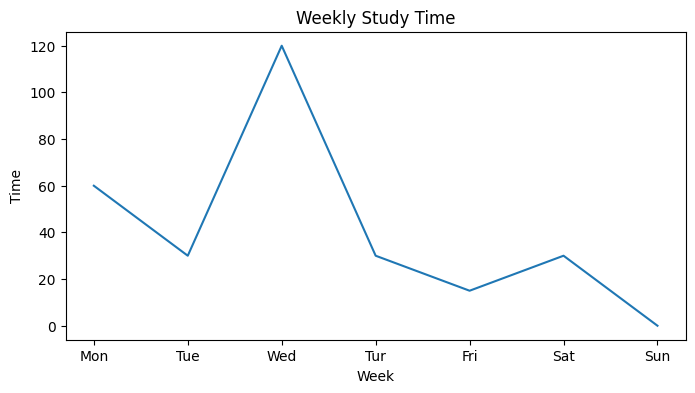

In [53]:
# 기본적인 plt 형식

# 가상의 데이터
x = ['Mon','Tue','Wed','Tur','Fri', 'Sat', 'Sun']
y = [60,30,120,30,15,30,0]

plt.figure(figsize=(8, 4)) # 그래프 사이즈 설정
plt.plot(x, y) # 그래프에 사용할 데이터 입력
plt.xlabel('Week') # x 축 라벨 이름 설정
plt.ylabel('Time') # y 축 라벨 이름 설정
plt.title('Weekly Study Time') # 그래프 제목 설정
plt.show()

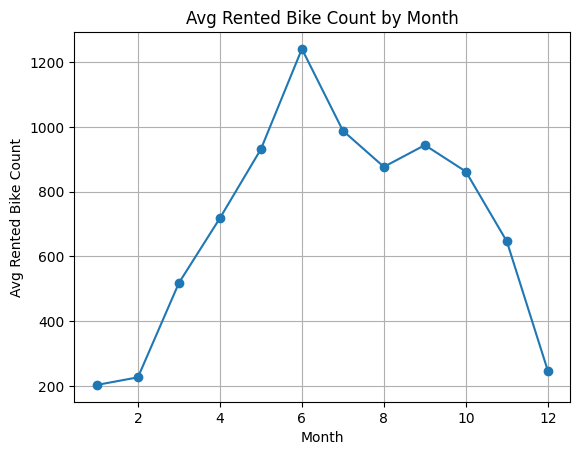

In [54]:
monthly_rent = df2.groupby('month')['Rented Bike Count'].mean()

plt.plot(monthly_rent.index, monthly_rent.values, marker='o')
plt.title('Avg Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Avg Rented Bike Count')
plt.grid(True)
plt.show()

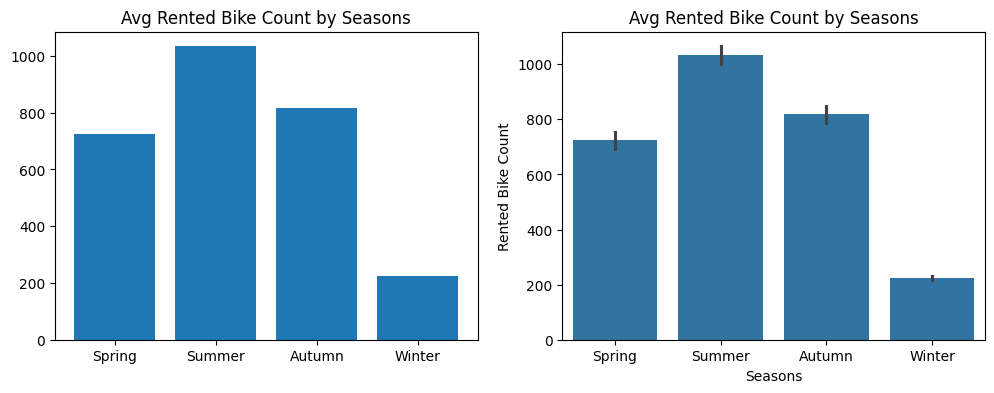

In [55]:
# 계절별 따릉이 평균 대여량 막대그래프 보기

seasons_sort = ['Spring', 'Summer', 'Autumn', 'Winter']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# 기본 plt 막대 그래프
axs[0].bar(df2.groupby('Seasons')['Rented Bike Count'].mean().reindex(seasons_sort).index,
           df2.groupby('Seasons')['Rented Bike Count'].mean().reindex(seasons_sort))
axs[0].set_title('Avg Rented Bike Count by Seasons')

# seaborn 막대그래프 위의 errorbar는 편차가 적을수록 길이가 짧아진다.
sns.barplot(data=df2, x='Seasons', y='Rented Bike Count', estimator='mean', order=seasons_sort, ax=axs[1]) # 디폴트 estimator는 평균이며, sum, median, min/max, std 등을 사용할 수 있다.
axs[1].set_title('Avg Rented Bike Count by Seasons')

plt.show()

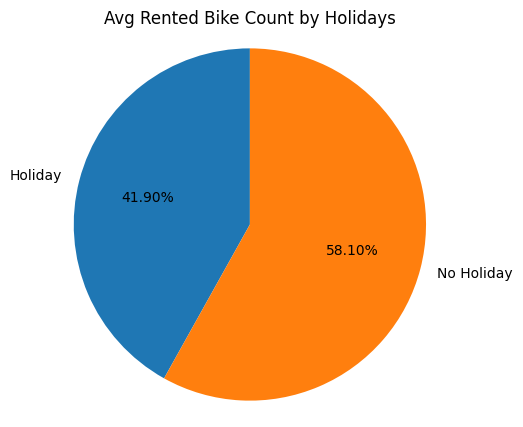

In [56]:
# 평일 대여량 평균 / 공휴일 대여량 평균 파이차트 시각화

holiday_mean = df2.groupby('Holiday')['Rented Bike Count'].mean().round(2)

plt.figure(figsize=(5,5))
plt.pie(holiday_mean , labels=holiday_mean.index, autopct='%1.2f%%', startangle=90)
plt.title('Avg Rented Bike Count by Holidays')
plt.axis('equal')
plt.show()

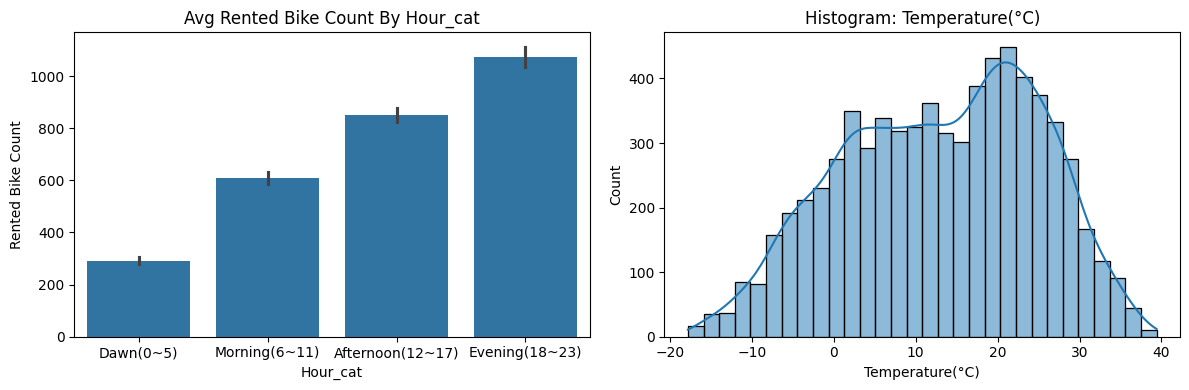

In [57]:
# 시간대별 평균 대여량과 온도 분포표.

fig, ax = plt.subplots(1, 2, figsize=(12, 4))


# 시간대별 평균 대여량
sns.barplot(data=df2, x='Hour_cat',
            y='Rented Bike Count', ax=ax[0])
ax[0].set_title('Avg Rented Bike Count By Hour_cat')

# Histogram - 온도 분포 파악
sns.histplot(data=df2, x=df2['Temperature(°C)'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Histogram: Temperature(°C)')

plt.tight_layout()
plt.show()


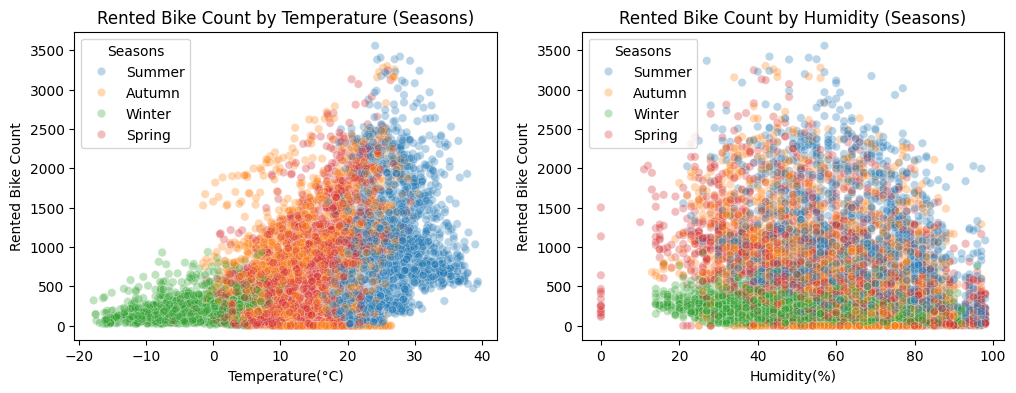

In [58]:
# 온도와 습도에따른 대여량 산점도 시각화

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df2, x='Temperature(°C)', y='Rented Bike Count', alpha=0.3, ax=ax[0], hue='Seasons')
ax[0].set_title('Rented Bike Count by Temperature (Seasons)')

sns.scatterplot(data=df2, x='Humidity(%)', y='Rented Bike Count', alpha=0.3, ax=ax[1], hue='Seasons')
ax[1].set_title('Rented Bike Count by Humidity (Seasons)')
plt.show()

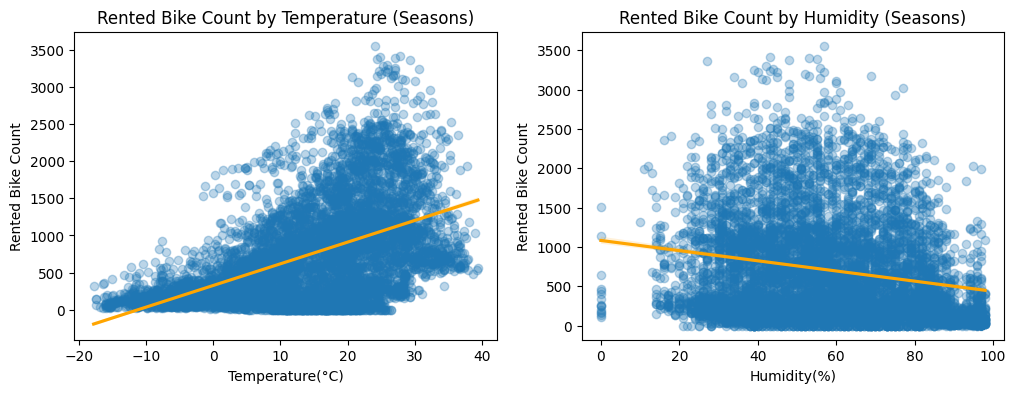

In [59]:
# 회귀 그래프를 보면 산점도 + 회귀선을 볼 수 있다.

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Temperature vs Rented Bike Count
sns.regplot(data=df2, x='Temperature(°C)', y='Rented Bike Count', ax=ax[0], scatter_kws={'alpha': 0.3}, line_kws={'color':'orange'})
ax[0].set_title('Rented Bike Count by Temperature (Seasons)')

# Humidity vs Rented Bike Count
sns.regplot(data=df2, x='Humidity(%)', y='Rented Bike Count', ax=ax[1], scatter_kws={'alpha': 0.3}, line_kws={'color':'orange'})
ax[1].set_title('Rented Bike Count by Humidity (Seasons)')
plt.show()


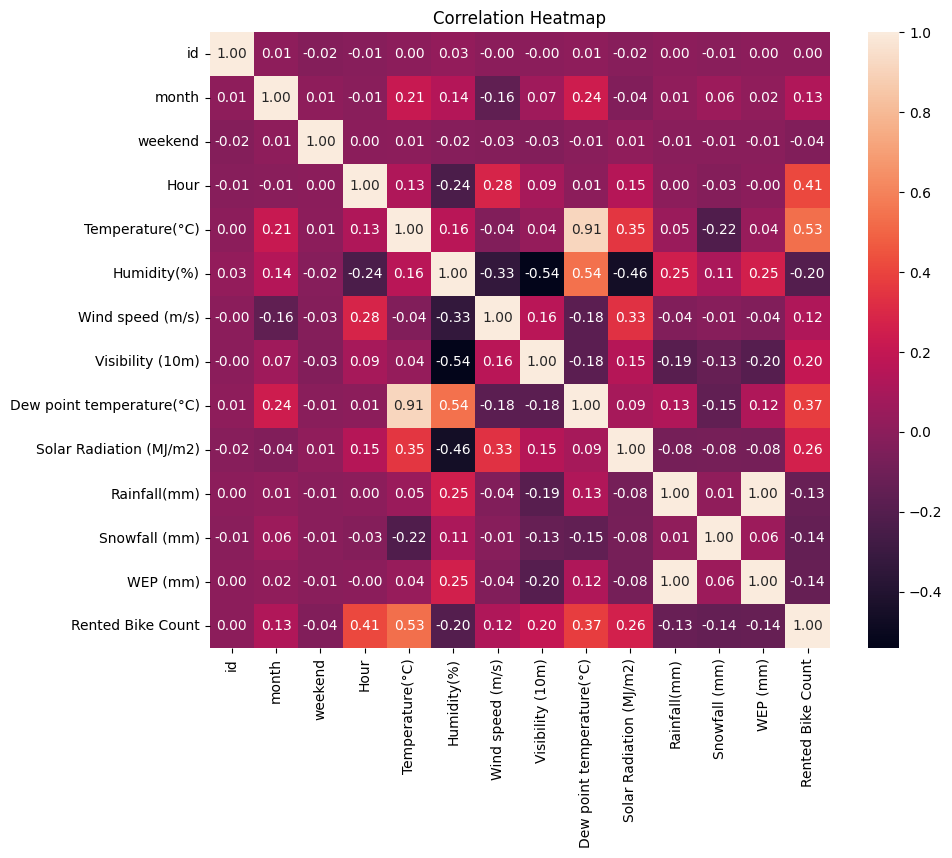

In [60]:
# 각 Feature간의 상관관계를 살펴보고, 분석 방향을 잡아 본다.

plt.figure(figsize=(10, 8))
df2.corr(numeric_only=True)
sns.heatmap(df2.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 심화 학습  
서울 따릉이 대여 정보 데이터셋을 통해 알 수 있는 데이터 자유롭게 분석 해보기

## 최대한 다양한 그래프를 만들어 보자  
하나의 타겟 변수에대한 막대그래프만 나열해 보아도 전체적인 그림을 그리기 용이하다.  
하지만, x, y축이 모두 수치형일때는 막대 그래프로 나타내기 어려울 수 있다.

### 예제

In [61]:
df2.columns

Index(['id', 'Date', 'month', 'dayname', 'weekend', 'Hour', 'Hour_cat',
       'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (mm)', 'WEP (mm)',
       'Seasons', 'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')

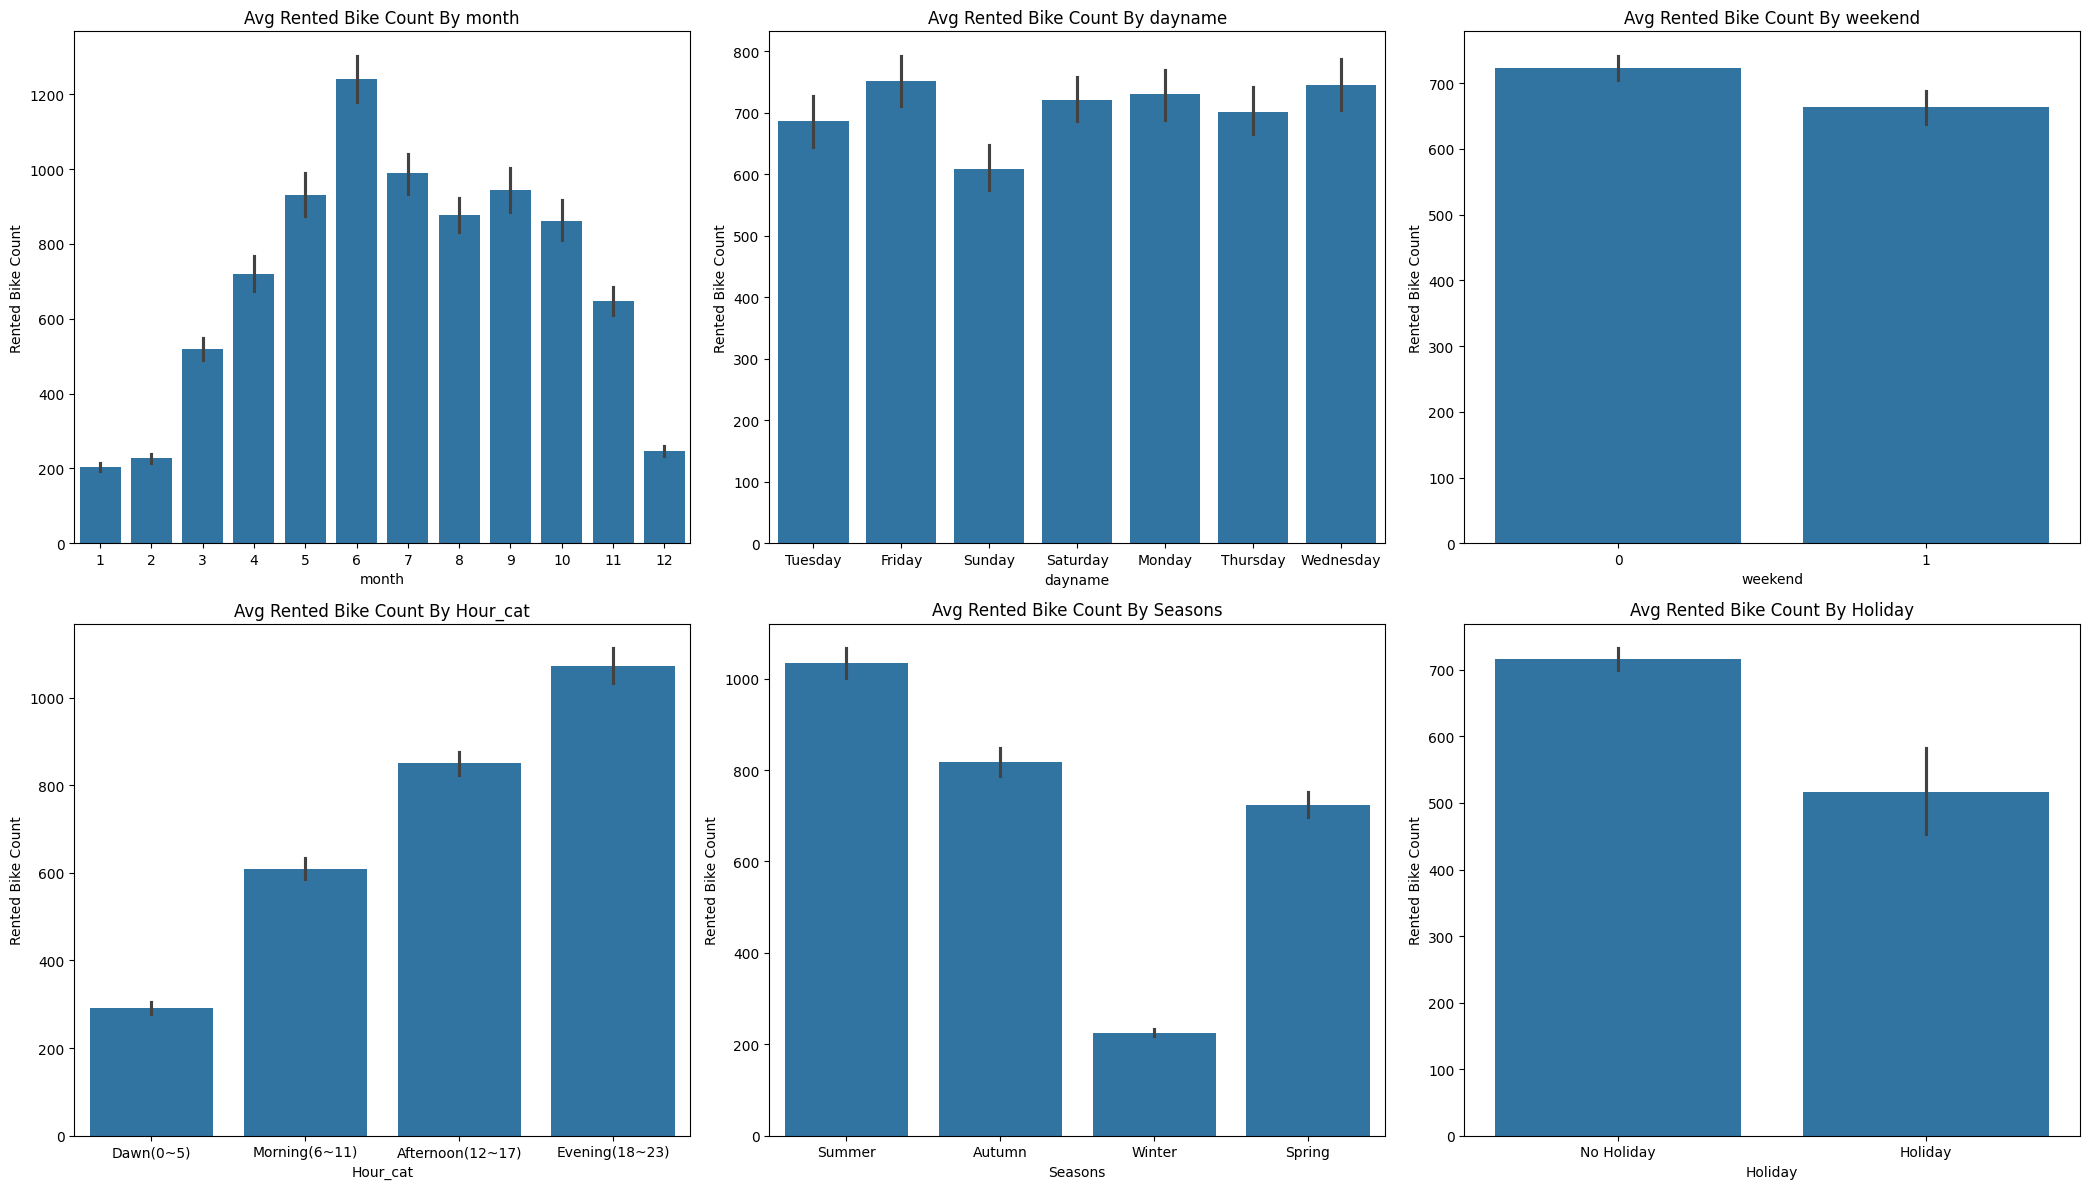

In [62]:
# 범주형 칼럼의 막대그래프
cat_cols = ['month', 'dayname', 'weekend', 'Hour_cat', 'Seasons', 'Holiday']

fig, axs = plt.subplots(2, 3, figsize=(21, 12))
axs = axs.flatten() # 반복문 사용시에는 편의성을 위해 2차원 배열을 1차원으로 펴준다.

for i, col in enumerate(cat_cols):
    sns.barplot(data=df2, x=col, y='Rented Bike Count', ax=axs[i])
    axs[i].set_title(f'Avg Rented Bike Count By {col}')

plt.tight_layout()
plt.show()


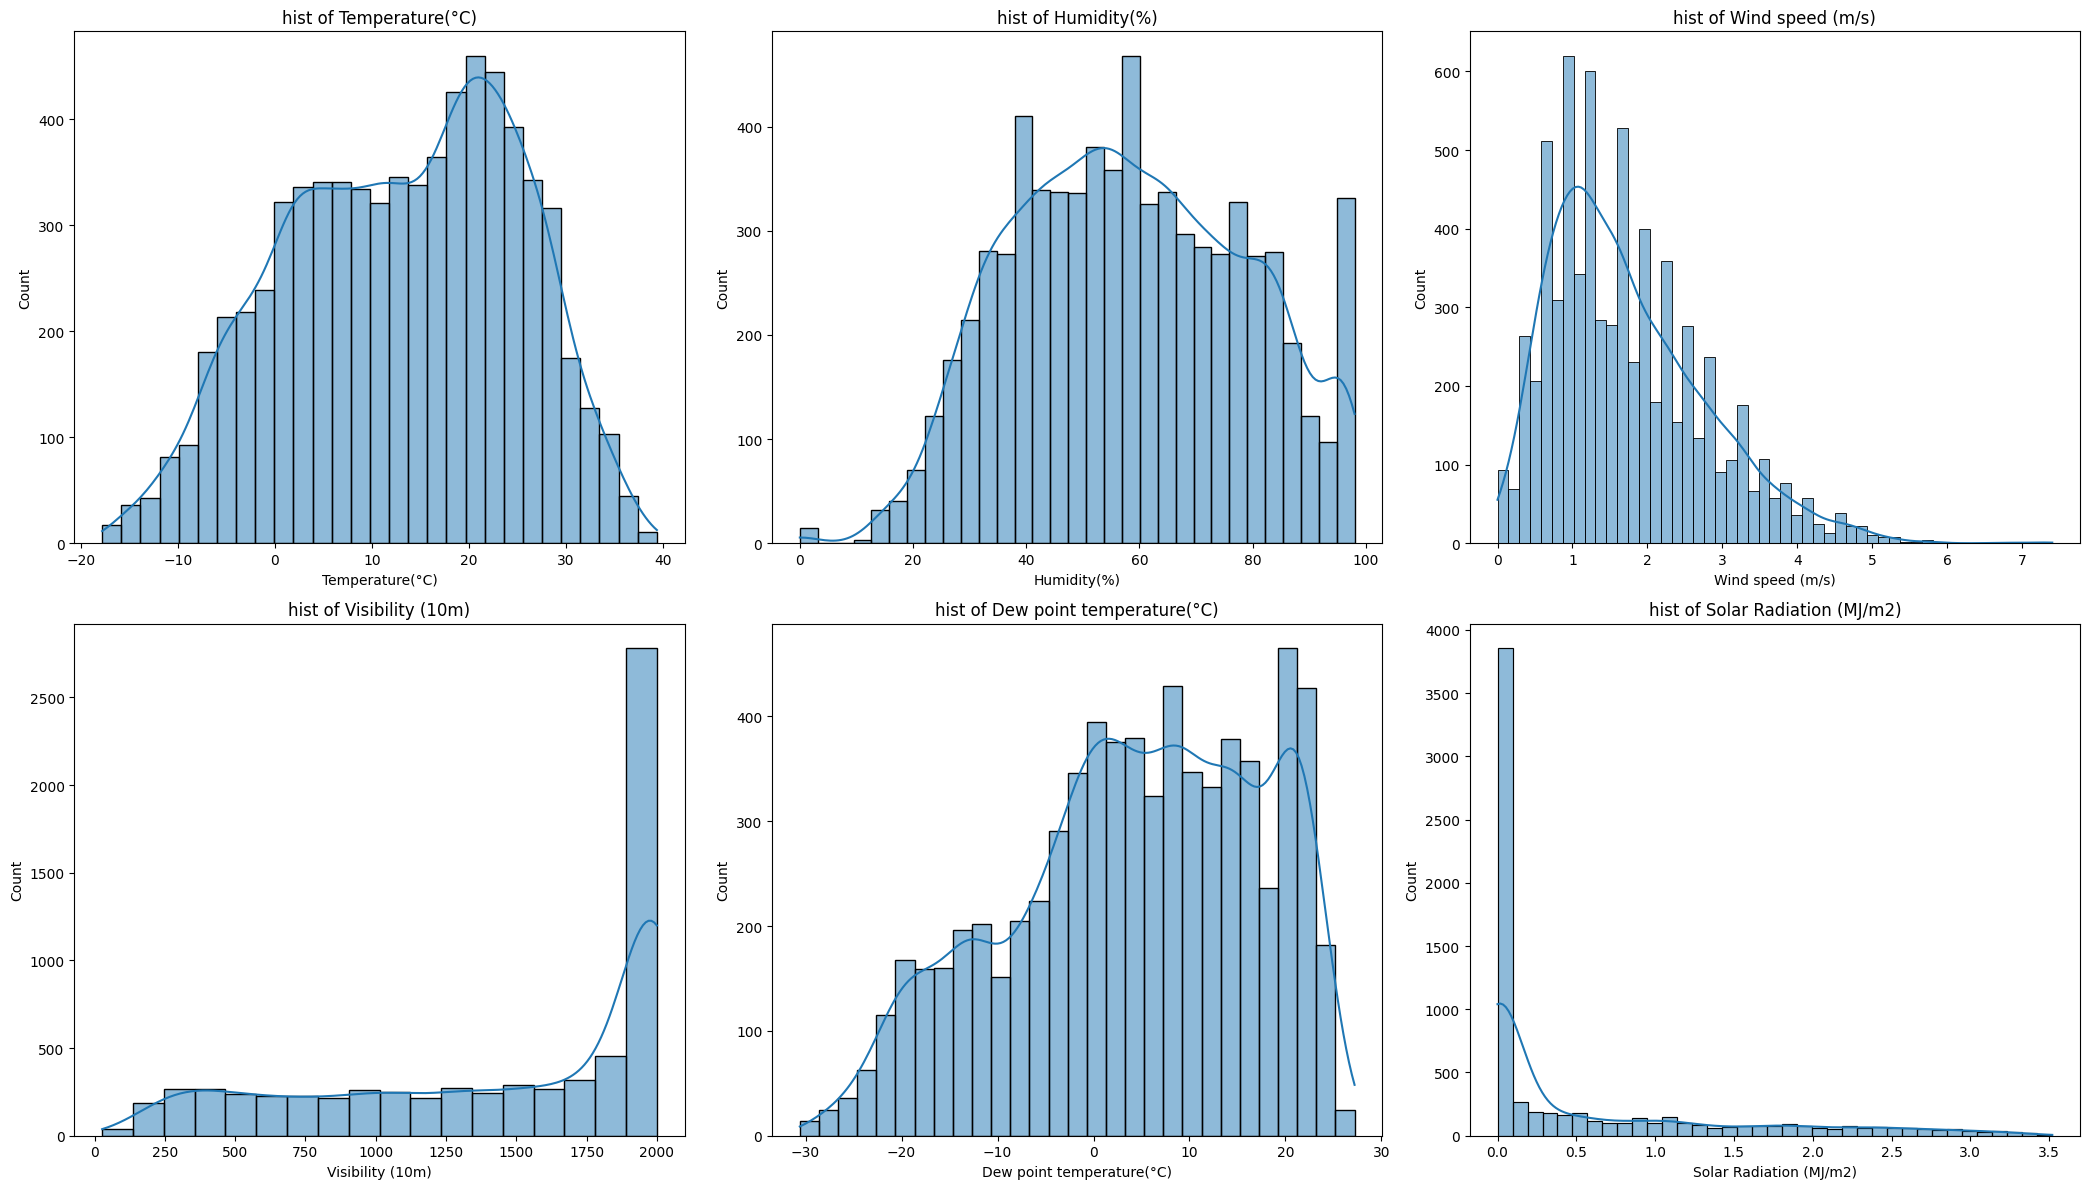

In [63]:
# 수치형 칼럼의 히스토그램 + KDE 그래프

num_cols = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
            'Visibility (10m)', 'Dew point temperature(°C)',
            'Solar Radiation (MJ/m2)']

fig, axs = plt.subplots(2, 3, figsize=(21, 12))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df2, x=col, kde=True, ax=axs[i])
    axs[i].set_title(f'hist of {col}')

plt.tight_layout()
plt.show()


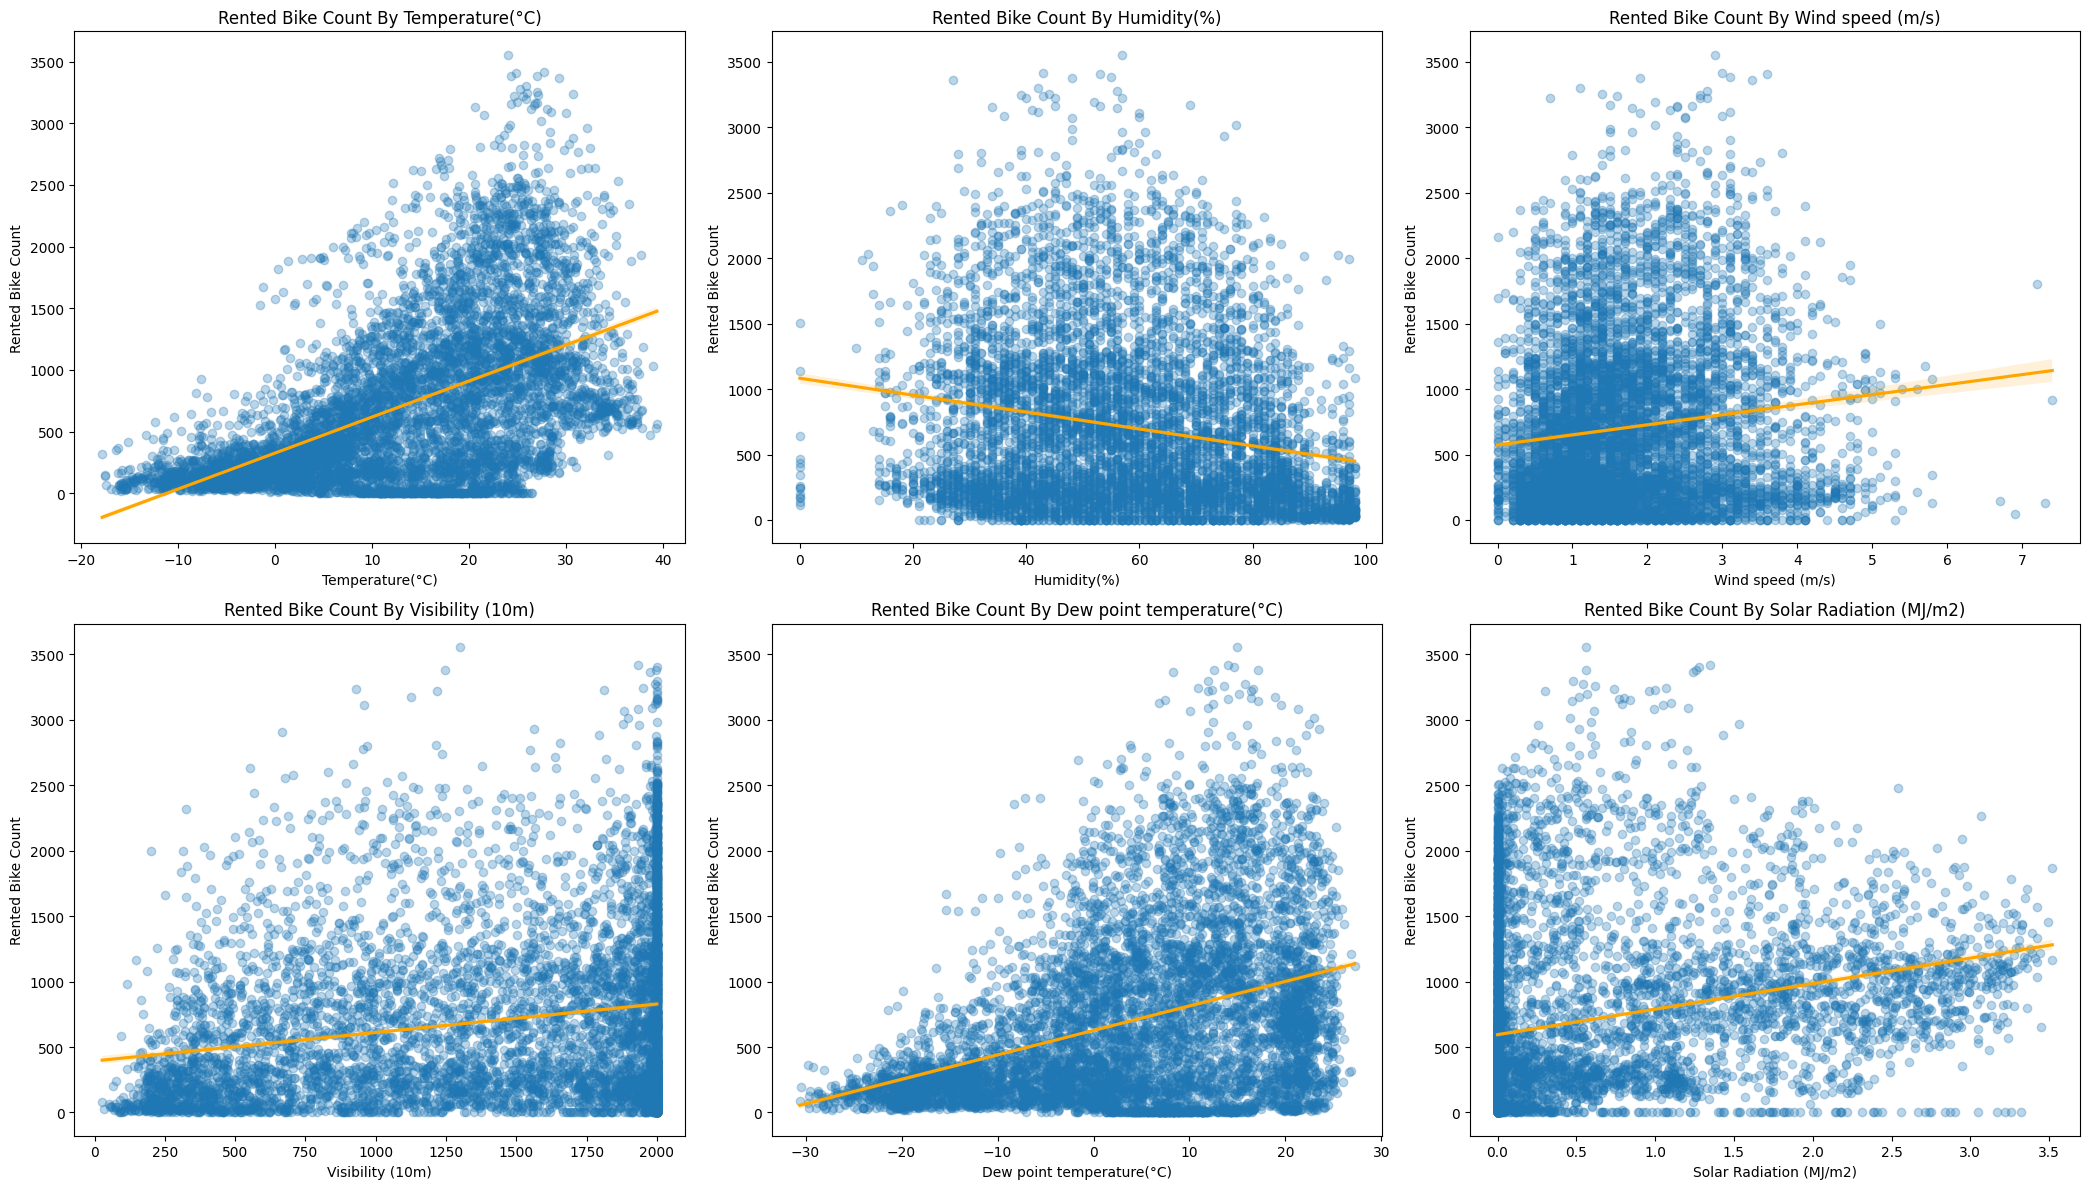

In [64]:
# 수치형 칼럼의 회귀선 그래프

fig, axs = plt.subplots(2, 3, figsize=(21, 12))
axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.regplot(data=df2, x=col, y='Rented Bike Count', ax=axs[i], scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})
    axs[i].set_title(f'Rented Bike Count By {col}')

plt.tight_layout()
plt.show()


## 비와 눈이 내리더라도 대여수가 비정상적으로 높았던 날은 언제일까?




### 예제

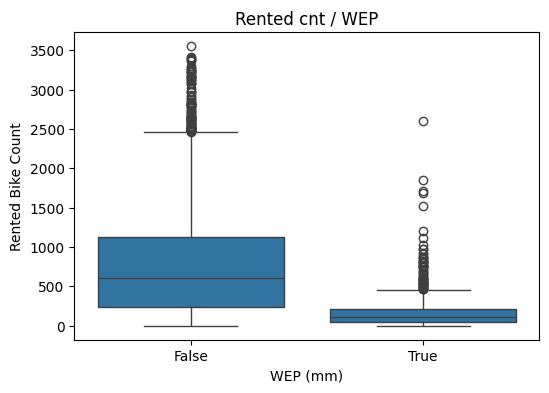

In [65]:
# 눈과 비가 오는날에도 대여수가 높았던 날을 파악 해본다.
plt.figure(figsize=(6, 4))
sns.boxplot(x=df2['WEP (mm)'] > 0, y=df2['Rented Bike Count'])
plt.title('Rented cnt / WEP')
plt.show()


In [66]:
# 비와 눈이 오는 와중에도 대여수가 유난히 많았던 이유가 있을까?

df2[(df2['WEP (mm)'] > 0) & (df2['Rented Bike Count'] > 1300)].sort_values(by='Rented Bike Count', ascending=False)

,id,Date,month,dayname,weekend,Hour,Hour_cat,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (mm),WEP (mm),Seasons,Holiday,Functioning Day,Rented Bike Count
1237,12763,2018-07-03,7,Tuesday,0,19,Evening(18~23),30.4,62,0.9,2000,22.2,0.65,0.1,0.00,0.10,Summer,No Holiday,Yes,2598
3897,12724,2018-08-09,8,Thursday,0,18,Evening(18~23),28.1,86,2.3,1244,25.5,0.28,0.5,0.00,0.50,Summer,No Holiday,Yes,1850
4867,10047,2018-08-30,8,Thursday,0,19,Evening(18~23),25.1,74,2.1,1105,20.1,0.00,0.5,0.00,0.50,Summer,No Holiday,Yes,1707
6937,15730,2018-08-31,8,Friday,0,8,Morning(6~11),23.1,80,0.2,1066,19.4,0.27,0.1,0.00,0.10,Summer,No Holiday,Yes,1686
4068,17338,2018-11-26,11,Monday,0,8,Morning(6~11),2.0,84,1.1,396,-0.4,0.03,0.0,0.03,0.03,Autumn,No Holiday,Yes,1524


In [67]:
# 데이터만으로 파악하기 어려운 것들도 존재한다.

wep_mor = df2[(df2['WEP (mm)'] < 1) & (df2['WEP (mm)'] > 0.2) & (df2['Hour_cat'] == ('Morning(6~11)'))]['Rented Bike Count'].mean()
wep_eve = df2[(df2['WEP (mm)'] < 1) & (df2['WEP (mm)'] > 0.2) & (df2['Hour_cat'] == ('Evening(18~23)'))]['Rented Bike Count'].mean()

mor = df2[df2['Hour_cat'] == 'Morning(6~11)']['Rented Bike Count'].mean()
eve = df2[df2['Hour_cat'] == 'Evening(18~23)']['Rented Bike Count'].mean()

print('출퇴근시간 WEP 1.0 이하 발생시 평균 대여량:', round((wep_mor + wep_eve) / 2, 2))
print('출퇴근시간 평균 대여량:', round((mor + eve) / 2, 2))
print('전체 평균 대여량:', df2['Rented Bike Count'].mean().round(2))

출퇴근시간 WEP 1.0 이하 발생시 평균 대여량: 227.32
출퇴근시간 평균 대여량: 841.12
전체 평균 대여량: 706.21


## 자유롭게 시각화하여 분석하고, 활용 가능한 인사이트를 찾아보기